### Bağımlı İki Örneklem Testi

Bir grup üzerinde bir değişimi görmek istiyoruz. 

    Varsayımlar: Normal Dağılım,Varyans Homojenliği
    Örnek Olay: Bir şirket grubuna eğitim veriyoruz , önceki ve sonraki durumlarını karşılaştırmak istiyoruz

In [2]:
import pandas as pd, numpy as np,seaborn as sns

In [3]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [30]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



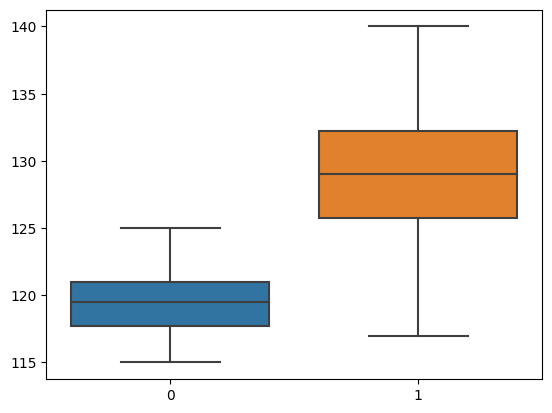

In [10]:
sns.boxplot([oncesi,sonrasi]);

In [11]:
#varsayim kontrolleri

<AxesSubplot: ylabel='Count'>

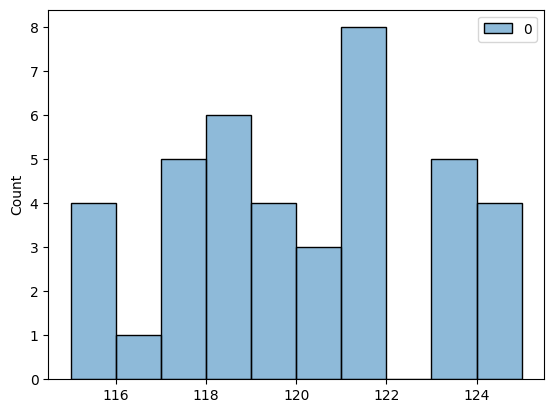

In [16]:
#Normal Dagilim
sns.histplot(oncesi,bins=10)

<AxesSubplot: ylabel='Count'>

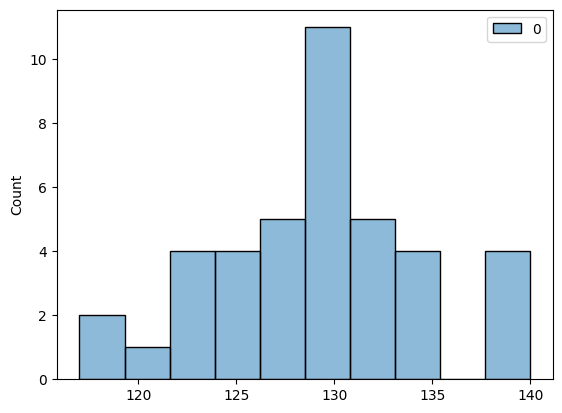

In [17]:
sns.histplot(sonrasi,bins=10)

In [25]:
#shapiro-wiks
from scipy.stats import shapiro
[shapiro(oncesi)[1],shapiro(sonrasi)[1]]

[0.10722016543149948, 0.6159630417823792]

<b>görüldüğü üzere normallik sağlanıyor

In [31]:
#Varyans homojenligi
stats.levene(AYRIK.ONCESI,AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

<b>Değer küçük olduğundan istediğimiz gibi homojendir diyebiliriz.
   Sonuc olarak testimize gecebiliriz

In [33]:
#Hipotez testi
stats.ttest_rel(AYRIK.ONCESI,AYRIK.SONRASI)

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

<b>H0 reddedildi yani calisanlar arasinda fark yoktur reddedilmesi sebebiyle arada anlamli bir fark vardir deriz.

### Eğer Varsayımlar sağlanmasaydı !!

In [37]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)